<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Proyecto 02: Free Style

### Instrucciones

* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_projectYY_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__: Bernardo Recabarren

__Rol__:201610004-0

## Prediciendo _Pulsars_

Un púlsar (del acrónimo en inglés de pulsating star, que significa «estrella que emite radiación muy intensa a intervalos cortos y regulares») es una estrella de neutrones que emite radiación periódica. Los púlsares poseen un intenso campo magnético que induce la emisión de estos pulsos de radiación electromagnética a intervalos regulares relacionados con el periodo de rotación del objeto. [Wikipedia](https://es.wikipedia.org/wiki/P%C3%BAlsar).

![pulsar](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Chandra-crab.jpg/600px-Chandra-crab.jpg)

_A composite image of the Crab Nebula showing the X-ray (blue), and optical (red) images superimposed. The size of the X-ray image is smaller because the higher energy X-ray emitting electrons radiate away their energy more quickly than the lower energy optically emitting electrons as they move._

### Descripción de los datos

In [1]:
!cat data/Readme.txt

******************************************************************************************

# HTRU2

Author: Rob Lyon, School of Computer Science & Jodrell Bank Centre for Astrophysics,
		University of Manchester, Kilburn Building, Oxford Road, Manchester M13 9PL.

Contact:	rob@scienceguyrob.com or robert.lyon@.manchester.ac.uk
Web:		http://www.scienceguyrob.com or http://www.cs.manchester.ac.uk
			or alternatively http://www.jb.man.ac.uk
******************************************************************************************

1. Overview

	HTRU2 is a data set which describes a sample of pulsar candidates collected during the
	High Time Resolution Universe Survey (South) [1]. 
	
	Pulsars are a rare type of Neutron star that produce radio emission detectable here on
	Earth. They are of considerable scientific interest as probes of space-time, the inter-
	stellar medium, and states of matter (see [2] for more uses). 
	
	As pulsars rotate, their emission beam sweeps across the sky, and 

### Objetivo

El objetivo es a partir de los datos, hacer la mejor predicción si un registro es un __pulsar__ o no. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. Sin embargo, se busca escoger el mejor modelo de clasificación con una métrica específica (_precision_).

* Se solicita ajustar tres modelos de clasificación, una regresión logística, KNN y un tercero a elección del siguiente [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Finalmente, realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 

En este informe __siempre__ debes utilizar _score_ / _scoring_ la métrica [_precision_](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), tanto para el _Cross Validation_, _Hyper Parameter Tuning_ y _Prediction_. Toda la información al respecto de las métricas se encuentra [aquí](https://scikit-learn.org/stable/modules/model_evaluation.html#metrics-and-scoring-quantifying-the-quality-of-predictions). 

### Evaluación

Este jupyter notebook debe ser autocontenido, considera que es un informe técnico donde debes detallar cada paso, comentando código, utilizando variables con nombres adecuados, realizando gráficos y agregando apreciaciones personales cuando sea necesario. __No escatimes recursos a la hora de escribir.__

__Escenario:__ Te encuentras trabajando como _data scientist / data analyst / machine learning engineer / etc._ y este trabajo será presentado al resto del equipo, en especial a tu jefe directo. Todos tienen conocimiento del problema y de machine learning, por lo que no puedes pasar por alto los aspectos técnicos de tu desarrollo. __Al final del informe, debes entregar tus conclusiones, visualizaciones y apreciaciones personales.__

__Preguntas a responder:__

* ¿Cuál modelo tiene mejor _precision_?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?
* ¿Por qué utilizar _precision_ y no otro score?


### Rúbrica

* __Estadística Descriptiva__ (5 pts)
* __Visualización__ (10 pts)
* __Preprocesamineto__ (5 pts)
* __Regresión Logística__ (10 pts)
* __K Nearest Neighbours__ (15 pts)
* __Modelo a elección__ (15 pts)
* __Selección de Modelos__ (20 pts)
* __Conclusiones__ (20 pts)

## Contenidos

* [Estadística Descriptiva](#descr_stat)
* [Visualización](#visualization)
* [Preprocesamineto](#preprocessing)
* [Regresión Logística](#logistic)
* [K Nearest Neighbours](#knn)
* [Modelo a elección](#free-style)
* [Selección de Modelos](#model-selection)
* [Conclusiones](#conclusions)

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(
    os.path.join("data", "HTRU_2.csv"),
    header=None,
    names=[
        "mean_integrated_profile",
        "std_integrated_profile",
        "excess_kurtosis_integrated_profile",
        "skewness_integrated_profile",
        "mean_dmsnr",
        "std_dmsnr",
        "excess_kurtosis_dmsnr",
        "skewness_dmsnr",
        "is_pulsar",
    ]
)
df.head()

,mean_integrated_profile,std_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skewness_dmsnr,is_pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


<a id='descr_stat'></a>

## Estadística Descriptiva

* Dar una pequeña definición de las columnas (_features_).
* Análisis descriptivo.
* Valores atípicos.
* Análisis específico a la variable _target_.

Cada Pulsar genera un único perfil de pulso, así las primeras columnas corresponden a estadísticas del perfil de pulso (integrated_profile) y las cuatro columnas siguientes corresponden a estadísticas de la curva DM-SNR ('Dispersion measure' vs 'Signal to Noise Ratio').
Las estadisticas que se utilizan en ambos casos son la media aritmética, desviación estándar, kurtósis y asimetría.

Nuestro target, de aquí en adelante será la variable 'is_pulsar', la cual nos índica con 1 si es pulsar y 0 si no lo es.

Definiremos un diccionario con la descripción de cada variable para utilizarla al momento de realizar futuros gráficos

In [4]:
dict_rename= {"mean_integrated_profile" : 'Mean of the integrated profile',
"std_integrated_profile" :'Standard deviation of the integrated profile',
"excess_kurtosis_integrated_profile": 'Excess kurtosis of the integrated profile',
"skewness_integrated_profile": 'Skewness of the integrated profile',
"mean_dmsnr": 'Mean of the DM-SNR curve',
"std_dmsnr": 'Standard deviation of the DM-SNR curve',
"excess_kurtosis_dmsnr": 'Excess kurtosis of the DM-SNR curve',
"skewness_dmsnr": 'Skewness of the DM-SNR curve'}

Viendo que tipos de datos y cuantos hay en cada columna

In [5]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
mean_integrated_profile               17898 non-null float64
std_integrated_profile                17898 non-null float64
excess_kurtosis_integrated_profile    17898 non-null float64
skewness_integrated_profile           17898 non-null float64
mean_dmsnr                            17898 non-null float64
std_dmsnr                             17898 non-null float64
excess_kurtosis_dmsnr                 17898 non-null float64
skewness_dmsnr                        17898 non-null float64
is_pulsar                             17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Ahora veamos la descripción de los datos que nos entrega pandas

In [6]:
df.describe(include='all')

,mean_integrated_profile,std_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skewness_dmsnr,is_pulsar
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


Por lo general, no se ve nada extraño, en la variable [is_pulsar] el rango esta dentro de lo esperado, eso sí se ve que el rango de los valores de asimetría es bastante grande, al igual que el valor del promedio del perfil integrado

In [7]:
df['is_pulsar'].unique()

array([0, 1])

In [8]:
df.isnull().any(axis=0).unique()

array([False])

Con esto vimos que los valores del target 'is_pulsar' son normales dentro de lo esperado, y además que no tenemos valores null dentro de nuestro dataframe

<a id='visualization'></a>

## Visualización

* Histogramas.
* Scatter matrix coloreando por el _target_.
* Mapa de calor con correlación entre variables.

Puedes utilizar `matplotlib` o `altair`, como sea de tu preferencia.

In [9]:
import altair as alt
import matplotlib.pyplot as plt

alt.themes.enable("opaque")

%matplotlib inline

alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

### Realizaremos gráficos para visualizar los datos

* Histogramas de las variables

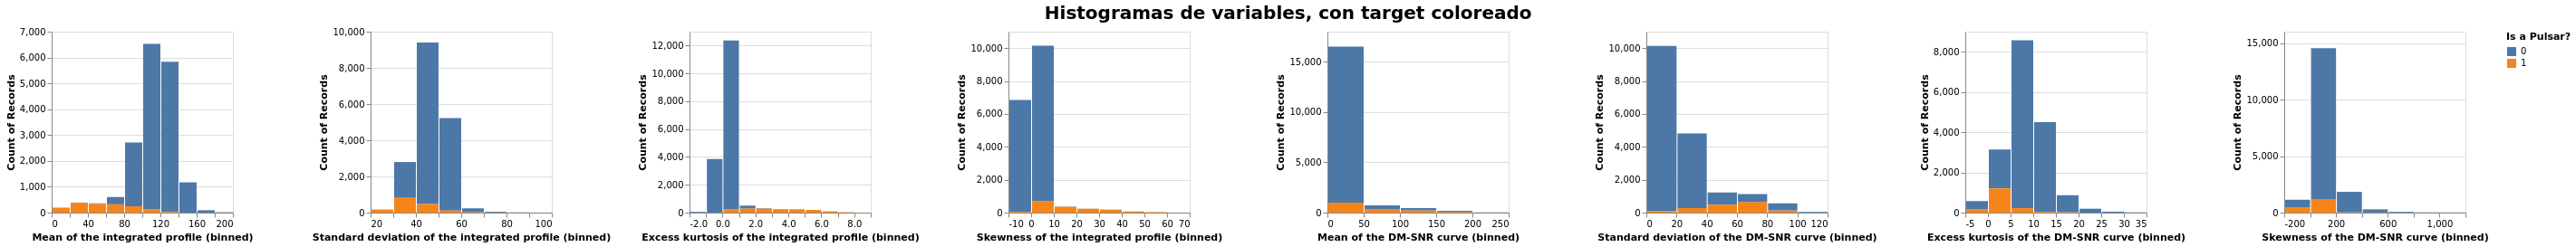

In [10]:
alt.Chart(df.rename(dict_rename,axis=1)).mark_bar().encode(
    x=alt.X(alt.repeat('column'),type='quantitative',bin=True),
    y='count()',
    color=alt.Color("is_pulsar:N",title='Is a Pulsar?')
).properties(
    height=200,
    width=200
).repeat(
    column=list(dict_rename.values()),
    title=alt.TitleParams(text='Histogramas de variables, con target coloreado', align='center', anchor='middle',fontSize=20)
)

Veamos que ya que los pulsares son mucho menos en cantidad, aportan menos al conteo del histograma, el cual se tuvo que realizar por clases ya que la variables son continuas

* Scatter Matrix (con el target coloreado)

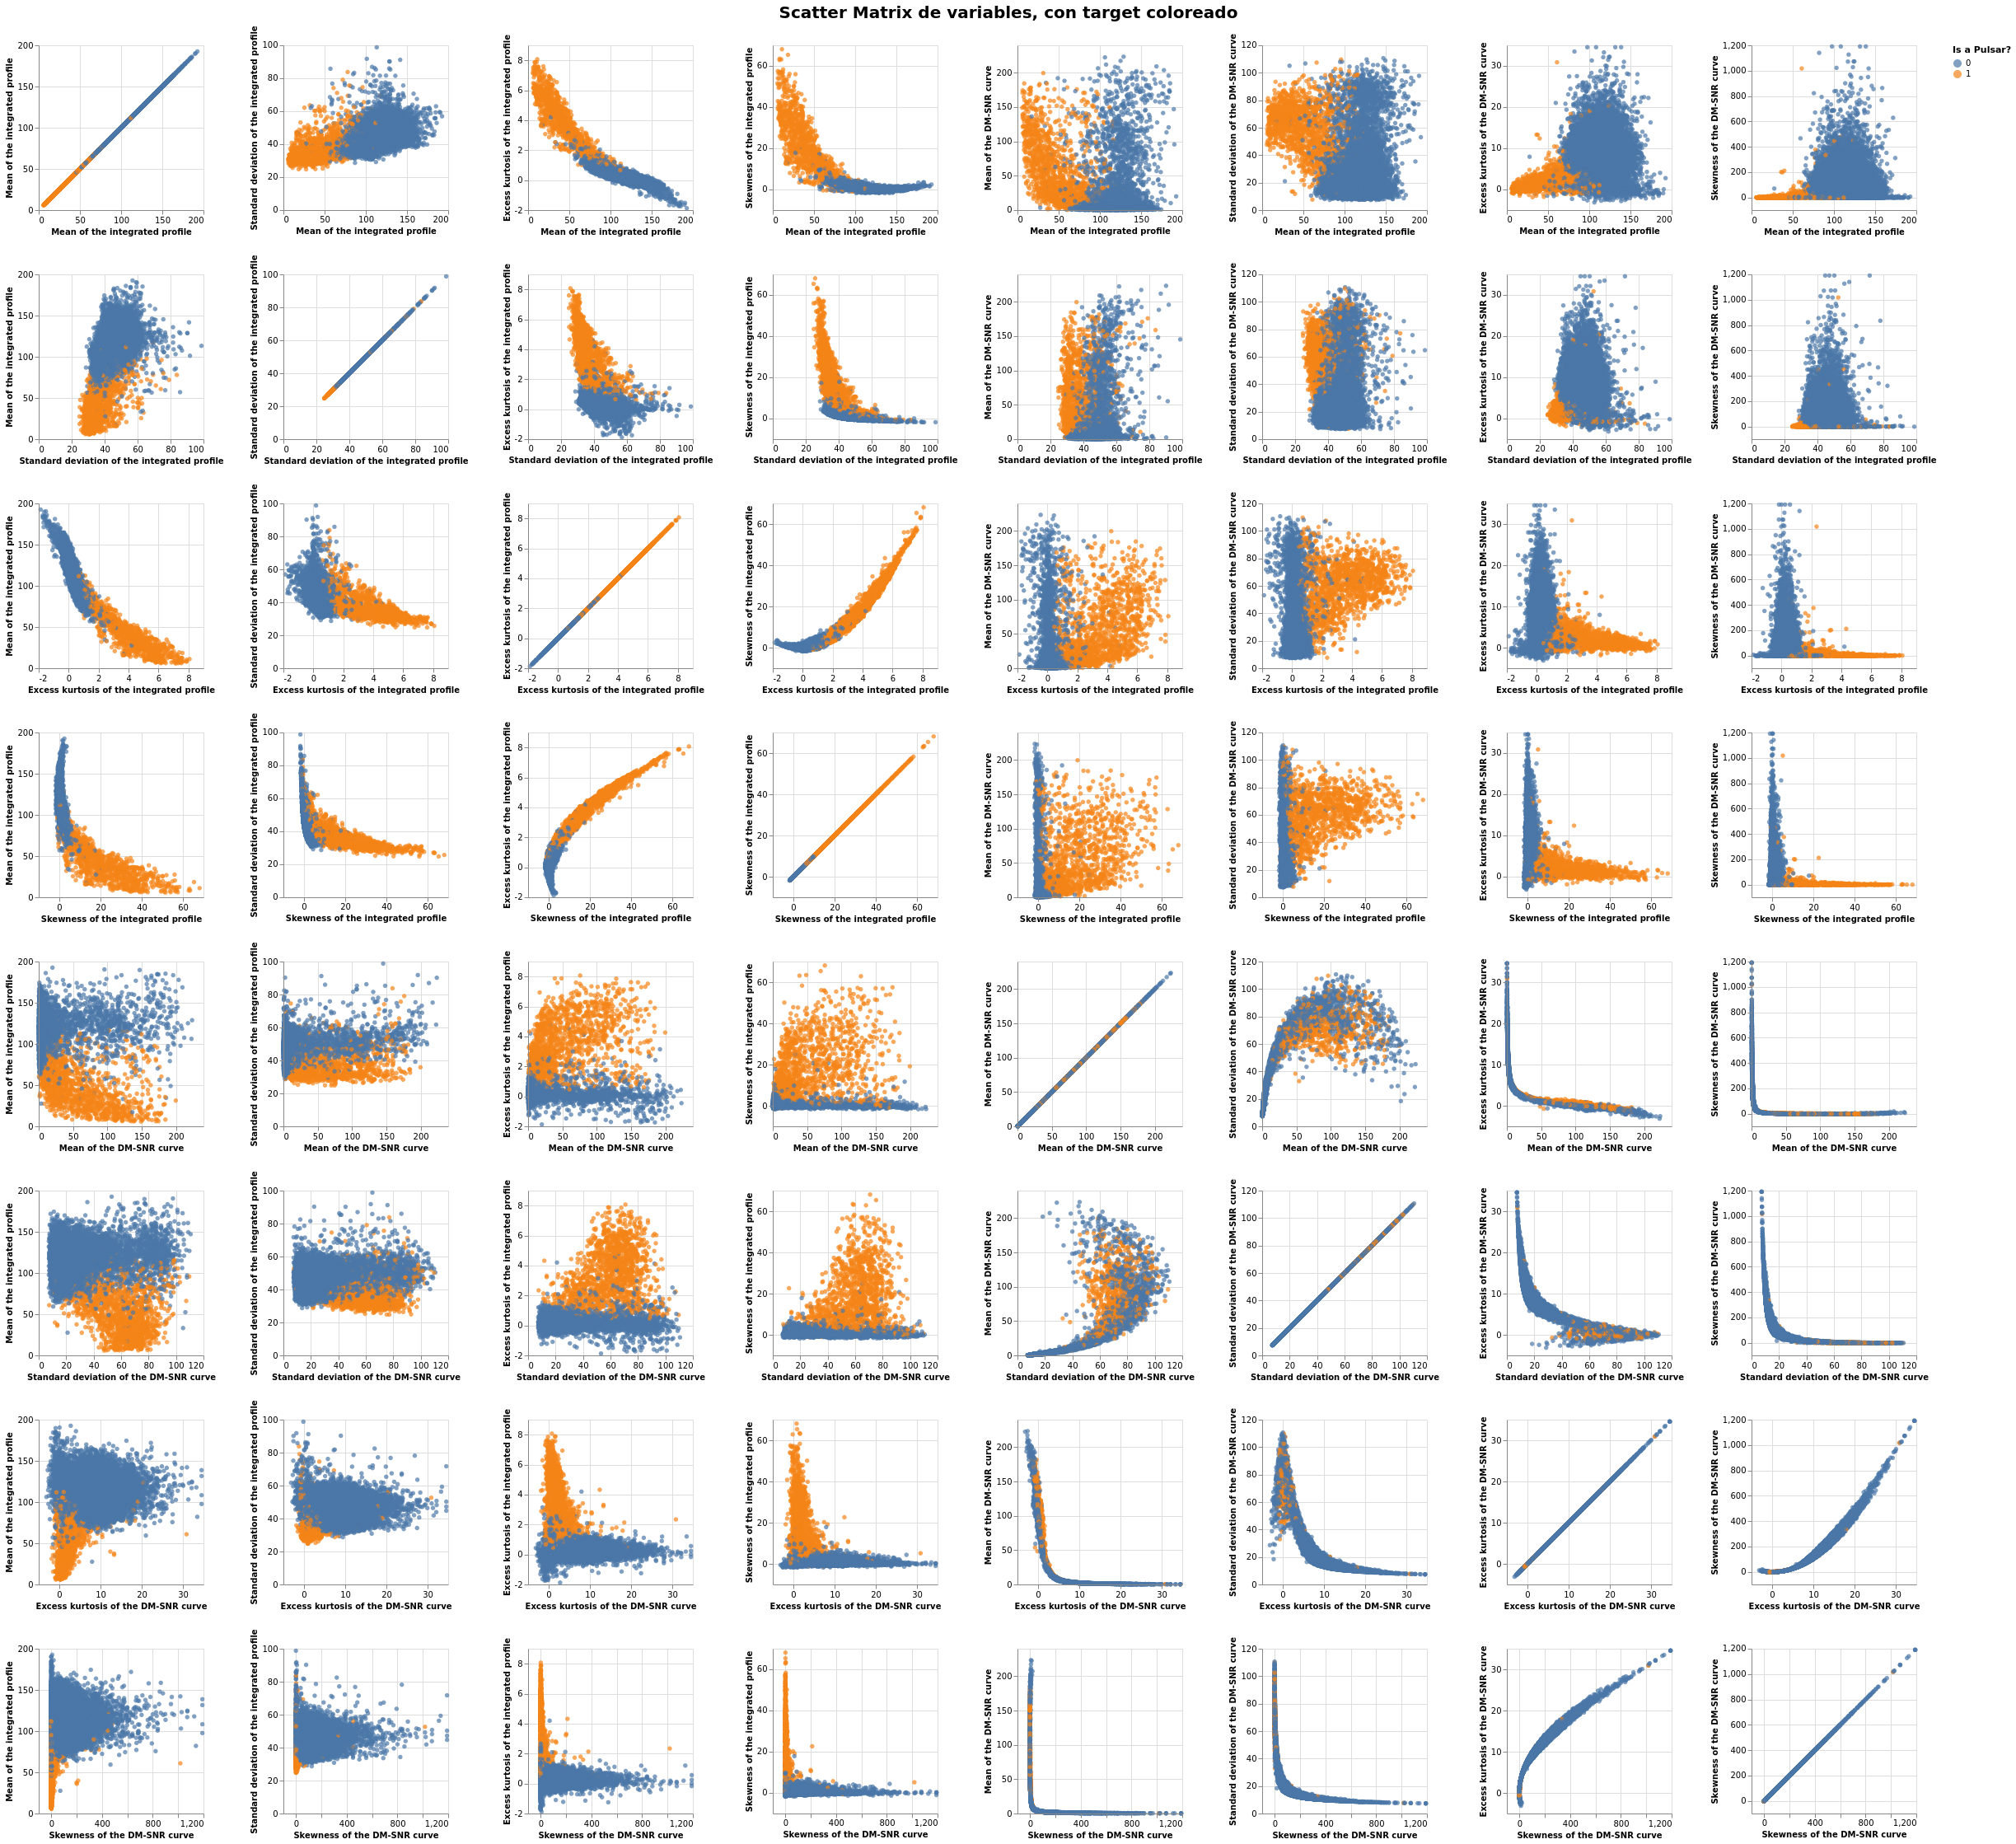

In [11]:
alt.Chart(df.rename(dict_rename,axis=1)).mark_circle().encode(
    x=alt.X(alt.repeat('row'),type='quantitative',axis=alt.Axis(titleFontSize=10)),
    y=alt.Y(alt.repeat('column'), type='quantitative',axis=alt.Axis(titleFontSize=10)),
    color=alt.Color("is_pulsar:N",title='Is a Pulsar?')
).properties(
    height=200,
    width=200
).repeat(
    column=list(df.rename(dict_rename,axis=1).drop(columns='is_pulsar').columns),
    row=list(df.rename(dict_rename,axis=1).drop(columns='is_pulsar').columns),
    title=alt.TitleParams(text='Scatter Matrix de variables, con target coloreado', align='center', anchor='middle',fontSize=20)
)

* Mapa de calor

In [12]:
corrMatrix = df.rename(dict_rename,axis=1).rename({'is_pulsar':'Is a pulsar?'}).corr().round(2).reset_index().rename(columns = {'index':'Var1'}).melt(id_vars = ['Var1'],
                                                                                                value_name = 'Corr',
                                                                                                var_name = 'Var2')

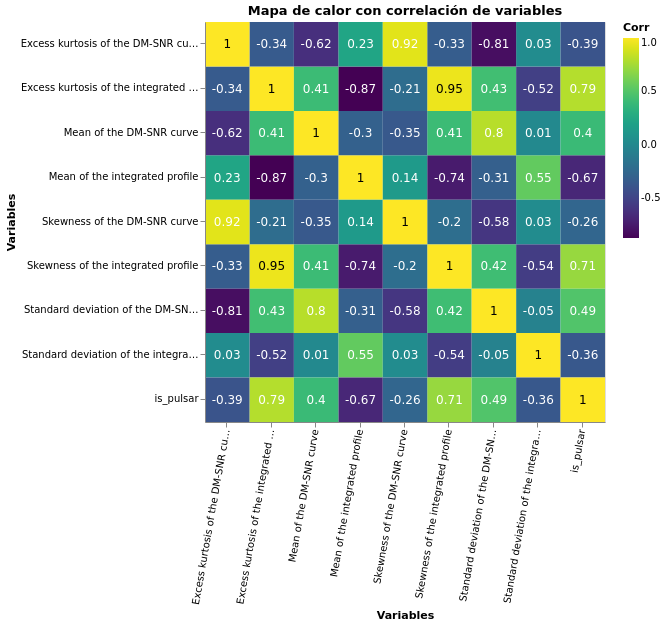

In [13]:
heatmap=alt.Chart(corrMatrix).mark_rect().encode(
    x=alt.X('Var1:O',title='Variables', axis=alt.Axis(labelAngle=-80)),
    y=alt.X('Var2:O',title='Variables'),
    color=alt.Color('Corr:Q',scale=alt.Scale(scheme='viridis'))
).properties(
    title='Mapa de calor con correlación de variables',
    height=400,
    width=400
)
text = heatmap.mark_text(baseline='middle', fontSize=12).encode(
    text=alt.Text('Corr:Q', format='.2'),
    color=alt.condition(
        alt.datum['Corr'] >= 0.95,
        alt.value('black'),
        alt.value('white')
    )
)
heatmap + text

<a id='preprocessing'></a>

## Preprocesamiento

Es hora de preparar los datos para la selección de modelos. Se solicita que:

* Crear el _numpy.array_ `X_raw` con las columnas predictoras de `df`.
* Crear el _numpy.array_ `y` con la columna a predecir de `df`.
* Definir un _transformer_ `StandarScaler` declarado como `scaler`, luego ajustar con los datos de `X_raw`.
* Definir el _numpy.array_ `X` luego de transformar los datos de `X_raw` con `scaler`. Verificar que tenga media nula y desviación estándar unitaria.
* Dividir la data en _train_ (90%) y _test_ (10%) utilizando como argumento `random_state=42`.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
X_raw = df.drop(columns='is_pulsar').values
y = df['is_pulsar'].tolist()

scaler = StandardScaler()
scaler.fit(X_raw)
X = scaler.transform(X_raw)

In [16]:
print('Promedio de X:','%.f' %X.mean())
print('Desviación estandar de X:','%.f'%X.std())

Promedio de X: 0
Desviación estandar de X: 1


Con esto se verifica que la transformación a una normal esta correcta

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

Separamos los datos en 90% para entrenar y 10% para testear

<a id='logistic'></a>

## Regresión Logística

Utiliza la función `cross_validate` con el estimador `logistic` para realizar una estimación del _score_

In [18]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

In [19]:
logistic_cv = cross_validate(LogisticRegression(),X_train,y_train,scoring='precision',cv=10)
logistic=LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
print(f'Logistic Regression Cross Validation precision score: {np.mean(logistic_cv["test_score"]):.4f} +/- {np.std(logistic_cv["test_score"]):.4f}')

Logistic Regression Cross Validation precision score: 0.9407 +/- 0.0180


<a id='knn'></a>

## K Nearest Neighbours

Utiliza `GridSearchCV` para encontrar el mejor valor de `n_neighbors`. Luego, con el mejor _estimator_ de `knn` realiza la validación cruzada para obtener el intervalo de confianza del _score_.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [22]:
param_grid = {"n_neighbors": np.arange(1, 15)}
gscv=GridSearchCV(KNeighborsClassifier(),param_grid=param_grid, scoring='precision').fit(X_train,y_train)

gscv.best_params_

{'n_neighbors': 2}

In [23]:
knn=KNeighborsClassifier(n_neighbors=2)

knn_cv = cross_validate(KNeighborsClassifier(n_neighbors=9),X_train,y_train,cv=10,scoring='precision')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [24]:
print(f'KNN Cross Validation precision score: {np.mean(knn_cv["test_score"]):.4f} +/- {np.std(knn_cv["test_score"]):.4f} with train data.')

KNN Cross Validation precision score: 0.9334 +/- 0.0205 with train data.


<a id='free_style'></a>

## Modelo a elección

* Escoge un modelo de clasificación de [aquí](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) que por lo menos tenga un hiperparámetro, por ejemplo, [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) tiene el parámetro de regularización `C`.
* Explica en uno o dos párrafos en qué consiste el algoritmo/modelo.
* Al igual que KNN, encuentra el/los mejores valores para los hiperparámetros.
* Con el mejor estimador realiza _Cross Validation_ con los datos de entrenamiento.
* Calcula el intervalo de confianza de _precision_.

Utilizaremos el modelo C-SVM, el cual consiste en separar la muestra a través de un hiperplano, de tal manera que quienes esten a un lado del hiperplano corresponden a una categoría y quienes esten al otro lado serán de la otra categoría, en este caso se busca el hiperplano tal que la distancia del punto más cercano de cada categoría sea máxima a este hiperplano.

Así el modelo C-SVM cuenta con un parámetro de regularización que cumple la misma función que en el modelo de regresión Ridge

In [25]:
from sklearn.svm import SVC

In [26]:
param_gridSVC={'C': np.arange(1,20)}

gscv_svc=GridSearchCV(SVC(), param_grid=param_gridSVC,scoring='precision').fit(X_train,y_train)

gscv_svc.best_params_

{'C': 13}

In [27]:
my_model=SVC(C=13)
my_model_cv = cross_validate(SVC(C=13),X_train,y_train,cv=10,scoring='precision')
my_model.fit(X_train,y_train)

SVC(C=13, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
print(f'C-SVC Cross Validation precision score: {np.mean(my_model_cv["test_score"]):.4f} +/- {np.std(my_model_cv["test_score"]):.4f} with train data.')

C-SVC Cross Validation precision score: 0.9395 +/- 0.0201 with train data.


<a id='model_selection'></a>

## Selección de Modelo

* Compara la _precision_ entre cada uno de los modelos.
* Grafica la matriz de confusión para cada uno de los modelos.
* Calcula un intervalo de confianza del tiempo utilizado en el ajuste de cada modelo. Ver documentación de `cross_validate`.
* Gráficos o reportes adicionales.

#### Comparando precision

In [29]:
from sklearn.metrics import precision_score, classification_report, plot_confusion_matrix

In [30]:
logistic_precision_score=precision_score(y_test,logistic.predict(X_test))
knn_precision_score=precision_score(y_test,knn.predict(X_test))
my_model_precision_score=precision_score(y_test,my_model.predict(X_test))

In [31]:
print(f'Logistic Regression test precision score: {logistic_precision_score:.4f} ')

print(f'KNN test precision score: {knn_precision_score:.4f}')

print(f'C-SVC test precision score: {my_model_precision_score:.4f}')

Logistic Regression test precision score: 0.9357 
KNN test precision score: 0.9496
C-SVC test precision score: 0.9504


El modelo que tuvo más precisión fue el C-SVC, con un precisión score de 0.9504

#### Matrices de confusión 

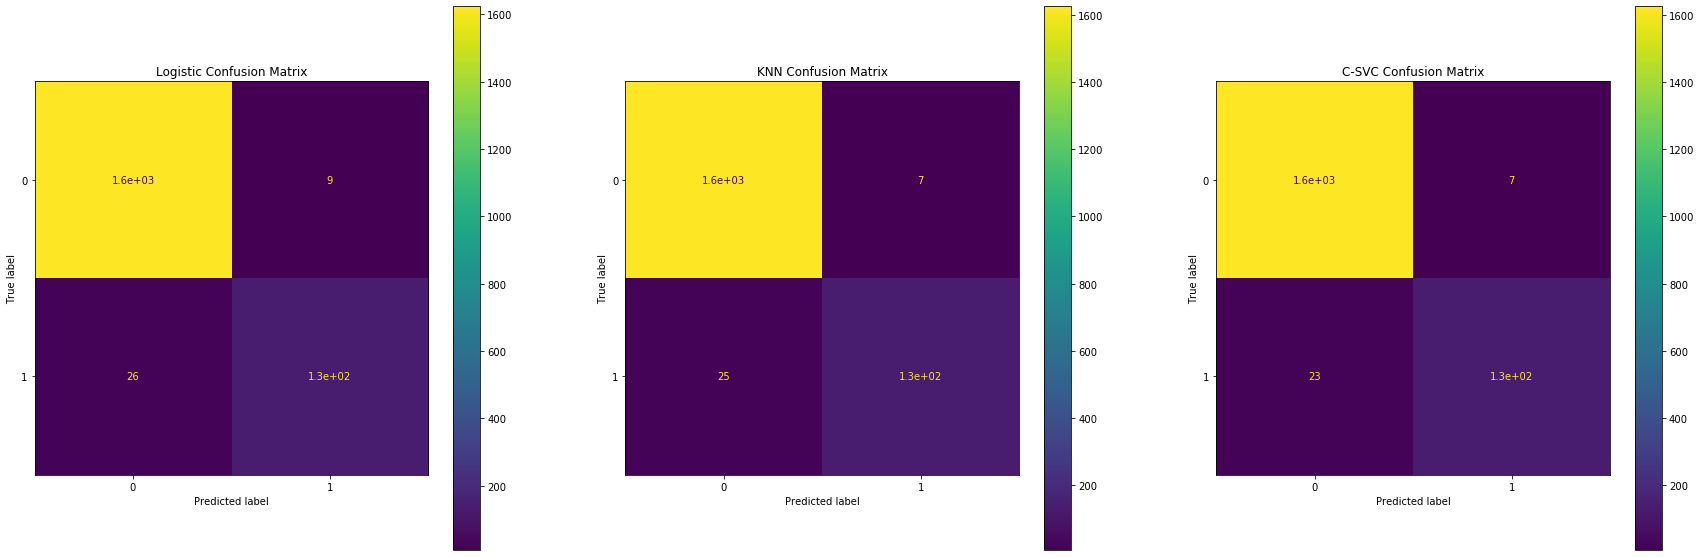

In [32]:
fig,ax= plt.subplots(1,3,figsize=(30,10))
plot_confusion_matrix(logistic,X_test,y_test,ax=ax[0])
ax[0].set_title('Logistic Confusion Matrix')
plot_confusion_matrix(knn,X_test,y_test,ax=ax[1])
ax[1].set_title('KNN Confusion Matrix')
plot_confusion_matrix(my_model,X_test,y_test,ax=ax[2])
ax[2].set_title('C-SVC Confusion Matrix')
plt.show(fig)

Se visualiza que la diferencia de predicciones malas entre cada modelo no es grande, con un rango de 5 errores entre el modelo más preciso y el menos preciso, así, se ve lo que se mostro con el precision_score, que el modelo más preciso fue el C-SVC

#### Intervalos de confianza de tiempo

In [33]:
print(f'Logistic Regression Fit Time: {np.mean(logistic_cv["fit_time"]):.4f} +/- {np.std(logistic_cv["fit_time"]):.4f} with train data')

Logistic Regression Fit Time: 1.1600 +/- 2.9604 with train data


In [34]:
print(f'KNN Fit Time: {np.mean(knn_cv["fit_time"]):.4f} +/- {np.std(knn_cv["fit_time"]):.4f} with train data')

KNN Fit Time: 0.0178 +/- 0.0008 with train data


In [35]:
print(f'C-SVC Fit Time: {np.mean(my_model_cv["fit_time"]):.4f} +/- {np.std(my_model_cv["fit_time"]):.4f} with train data')

C-SVC Fit Time: 0.8223 +/- 0.0260 with train data


Aquí se puede ver que si bien el modelo más preciso fue el C-SVC fue el que más se demoro, en cambio el modelo más rapido fue el KNN, que además consiguió el segundo mejor precision_score con 0.9496

#### Curvas de aprendizaje

Ya que vimos los modelos, veamos la escalabilidad de estos, para eso utilizaremos el código que utilizamos en el primer proyecto

In [36]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [37]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

##### Logistic Regression

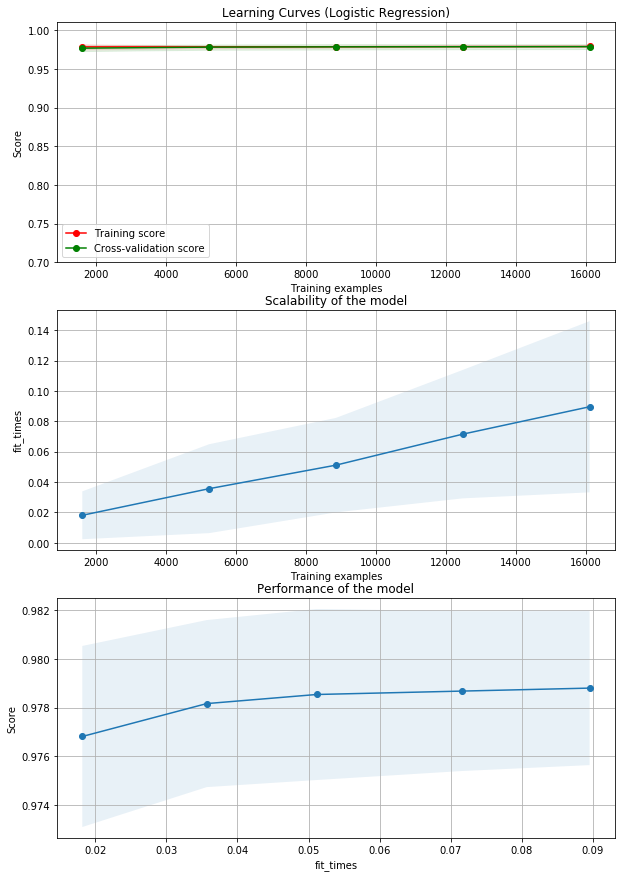

In [38]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 10% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)

estimator = logistic
plot_learning_curve(estimator, title, X, y, axes=axes, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
plt.show()


#####  KNN

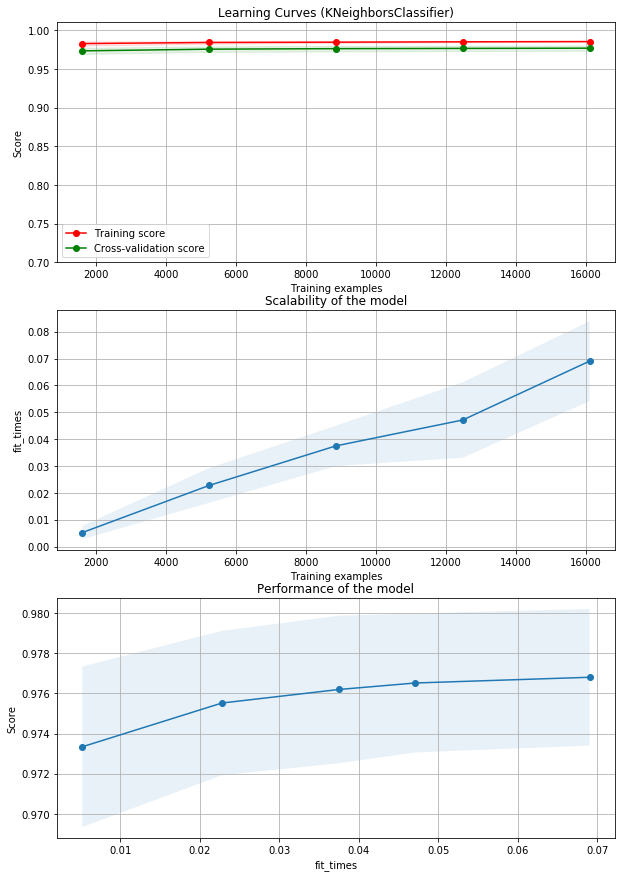

In [39]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (KNeighborsClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 10% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)

estimator = knn
plot_learning_curve(estimator, title, X, y, axes=axes, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
plt.show()


##### C-SVC

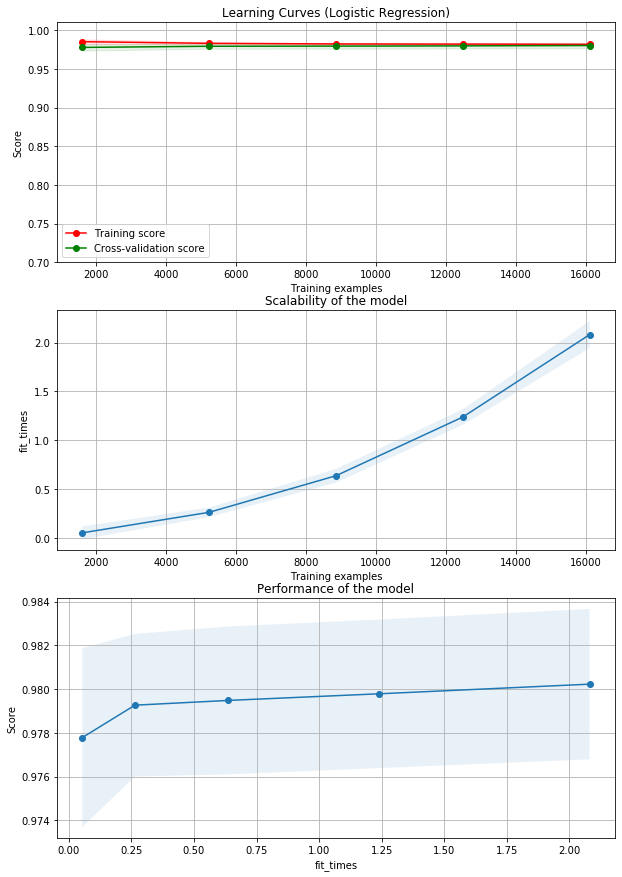

In [40]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)

estimator = my_model
plot_learning_curve(estimator, title, X, y, axes=axes, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
plt.show()


Con esto se puede ver que a pesar de la buena precisión del modelo C-SCV, se consigue la problematica de la escalabilidad al momento de entrenar el modelo, a diferencia del KNN que es bastante escalable

## Conclusiones

Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultados, etc.

#### Preguntas iniciales:

    1) ¿Cuál modelo tiene mejor precision?
    2) ¿Cuál modelo demora menos tiempo en ajustarse?
    3) ¿Qué modelo escoges?
    4) ¿Por qué utilizar precision y no otro score?

1), 2) Como se ha dicho anteriormente, el modelo con mejor precisión fue el que propusimos, C-SVC, y el modelo en que se demora menos en ajustarse fue el KNN.

3) Con los datos de escalabilidad, y dada la precisión del modelo KNN, es que nos quedaremos con este, principalmente debido a que la cantidad de datos en astrofisica es inmensa, y se busca conseguir un modelo que tenga una buena escalabilidad, desechamos el modelo de regresión logistica, debido a que si bien, tenia buena precisión, el modelo KNN, escala mejor y en este caso nos dio una mejor precisión con menor tiempo de entrenamiento.

4) Se utiliza el precision como score, debido a que se trata de clasificar de forma binaria los datos, por lo que nos da una forma de evaluar los modelos mas sencilla.

Para trabajos futuros, dada la elección del modelo se podría ver con una data mas grande como funciona este, además de buscar que variables son las influyentes y a partir de estas generar mejores predicciones.